## Part a,b)

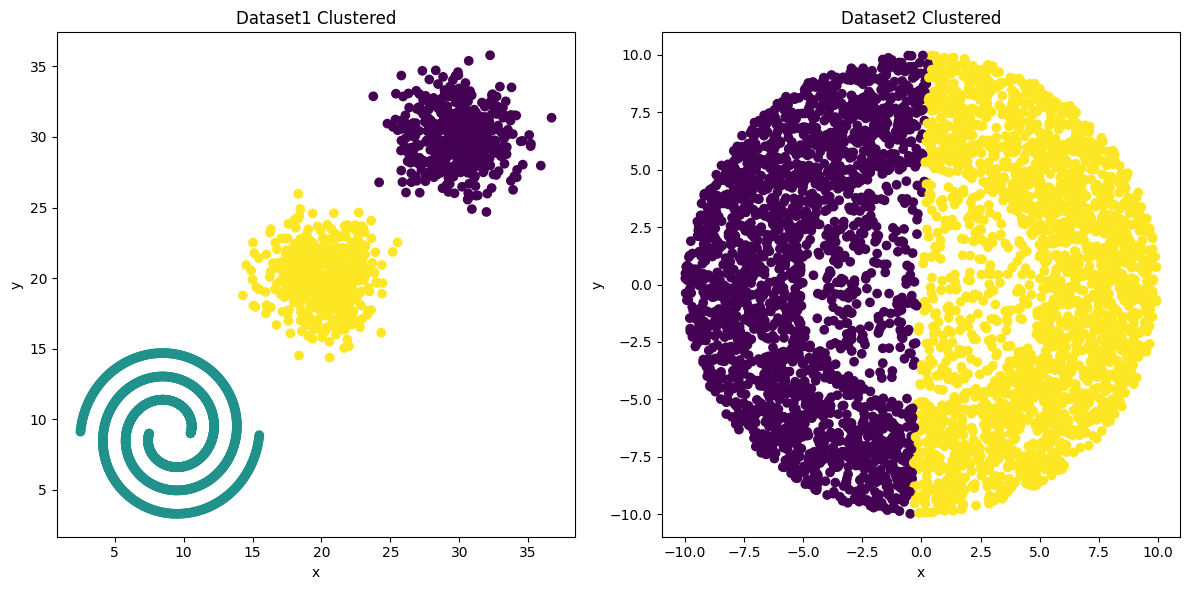

Cluster centers for Dataset1:
 [[29.89850662 30.02981985]
 [ 9.          9.        ]
 [20.09935944 19.94999309]]
Cluster centers for Dataset2:
 [[-4.76279424  0.18370521]
 [ 4.65976256 -0.1775503 ]]


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


dataset1 = pd.read_csv('./Datasets/Dataset1.txt', delimiter=',')
dataset2 = pd.read_csv('./Datasets/Dataset2.txt', delimiter=',')

data1 = dataset1[['x', 'y']]
data2 = dataset2[['x', 'y']]

kmeans1 = KMeans(n_clusters=3, random_state=13).fit(data1)  # For Dataset1
kmeans2 = KMeans(n_clusters=2, random_state=13).fit(data2)  # For Dataset2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data1['x'], data1['y'], c=kmeans1.labels_, cmap='viridis')
plt.title('Dataset1 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(data2['x'], data2['y'], c=kmeans2.labels_, cmap='viridis')
plt.title('Dataset2 Clustered')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

print("Cluster centers for Dataset1:\n", kmeans1.cluster_centers_)
print("Cluster centers for Dataset2:\n", kmeans2.cluster_centers_)

## part c)

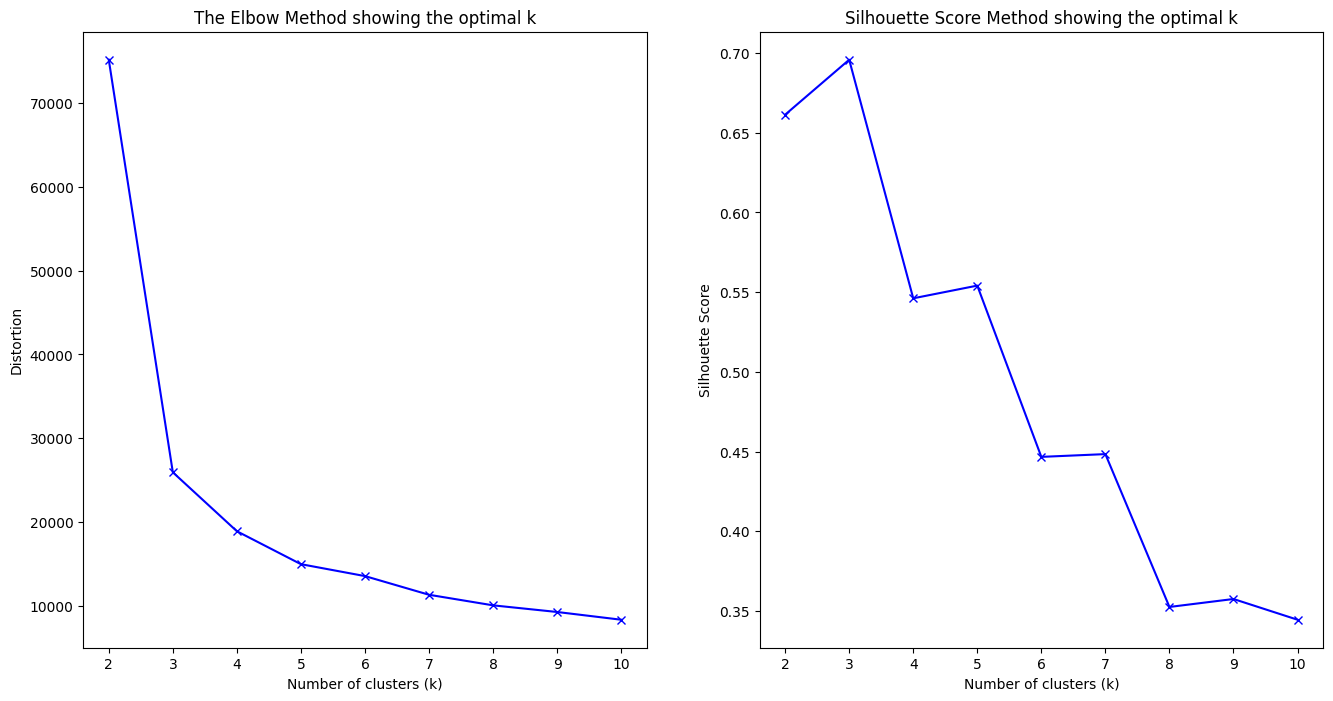

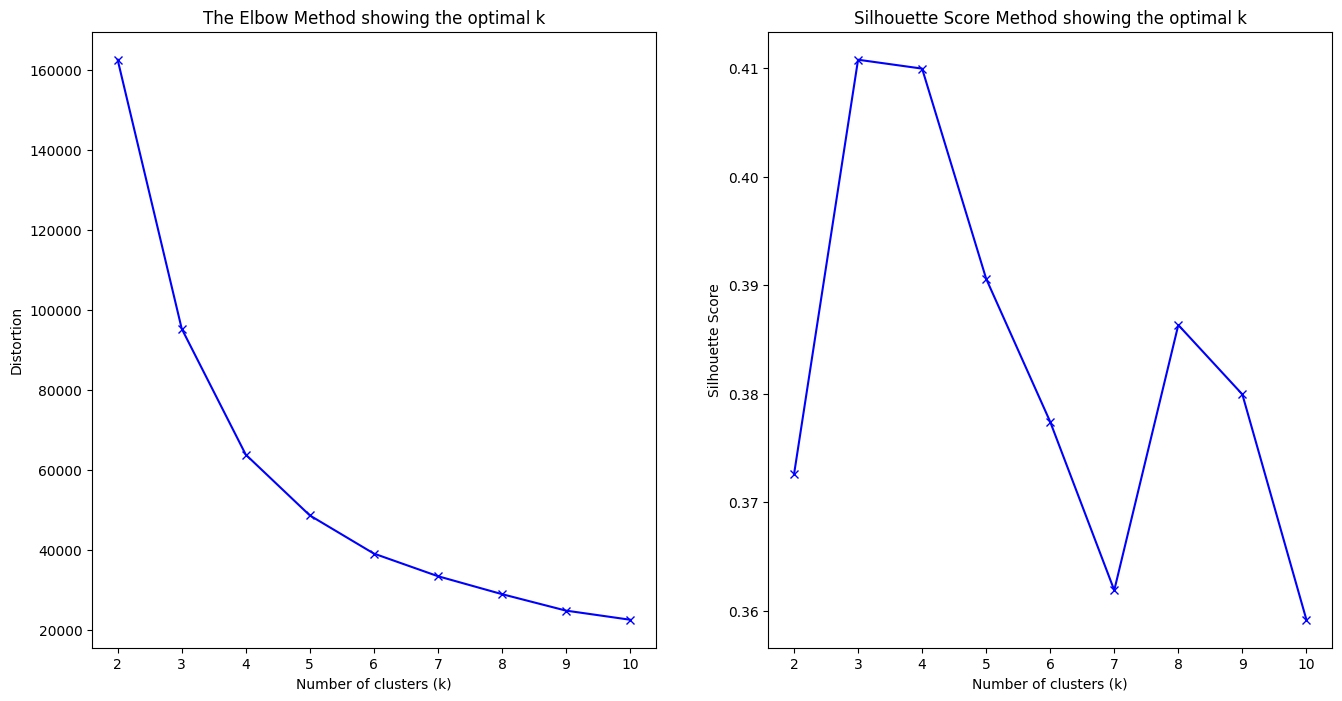

Silhouette Score for Dataset1 with 3 clusters: 0.34452789128572237
Silhouette Score for Dataset2 with 2 clusters: 0.35915449132074584
Cluster centers for Dataset1:
 [[28.50714429 31.76715973]
 [13.12704839  7.69235137]
 [19.99860796 18.48715533]
 [ 5.66006497 11.68547585]
 [31.92316613 30.02857679]
 [ 9.70365779  5.13159425]
 [10.52259936 11.7693145 ]
 [20.21668476 21.65347084]
 [28.90126915 28.20314985]
 [ 6.33871775  7.25122717]]
Cluster centers for Dataset2:
 [[-1.90200786 -7.3847559 ]
 [-0.69618378 -0.23425011]
 [-0.05435782  7.33377133]
 [ 7.5026016   1.01456492]
 [-5.14259608  5.4302314 ]
 [ 6.45419146 -3.57619683]
 [-7.65284761  0.54376868]
 [-6.12320863 -4.58866822]
 [ 5.06872651  5.42309018]
 [ 2.93135034 -6.79572022]]


In [2]:
from sklearn.metrics import silhouette_score
def plot_elbow_method(data, max_k=10):
    distortions = []
    silhouette_scores = []
    K = range(2, max_k+1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=13)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
        
    plt.figure(figsize=(16, 8))
    
    plt.subplot(1, 2, 1)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method showing the optimal k')
    
    plt.show()

plot_elbow_method(data1, max_k=10)

plot_elbow_method(data2, max_k=10)


silhouette_score1 = silhouette_score(data1, kmeans1.labels_)
silhouette_score2 = silhouette_score(data2, kmeans2.labels_)

print(f"Silhouette Score for Dataset1 with 3 clusters: {silhouette_score1}")
print(f"Silhouette Score for Dataset2 with 2 clusters: {silhouette_score2}")


print("Cluster centers for Dataset1:\n", kmeans1.cluster_centers_)
print("Cluster centers for Dataset2:\n", kmeans2.cluster_centers_)

## part d,e)

Silhouette Score for Dataset1 with DBSCAN: 0.2692457066977102
Silhouette Score for Dataset2 with DBSCAN: -0.14966807505921909


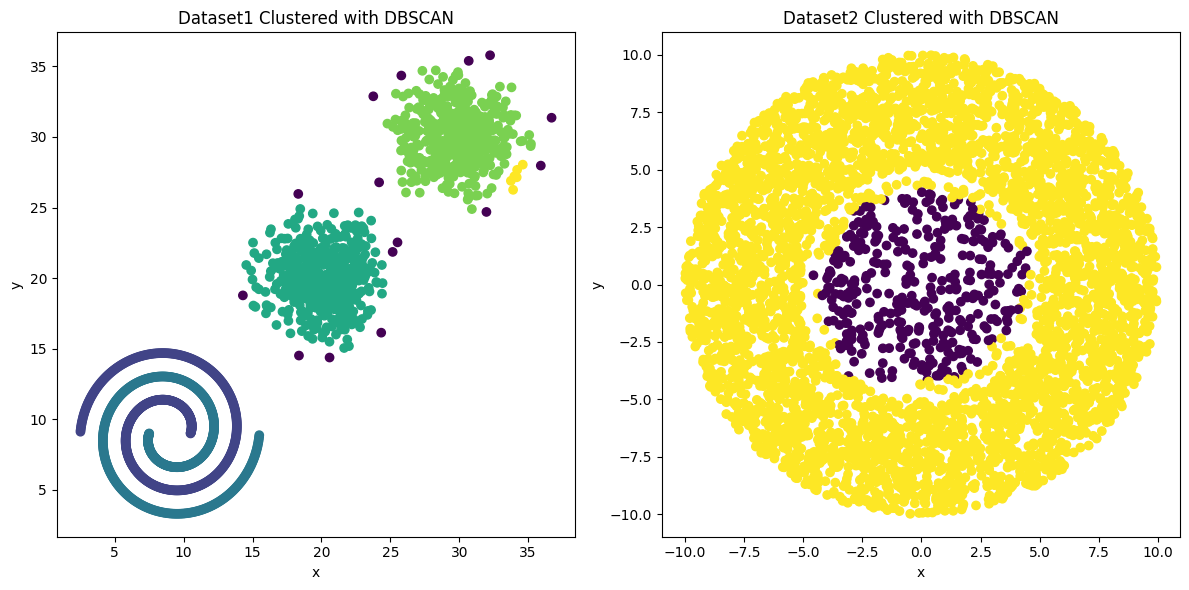


Comparison of Silhouette Scores:
KMeans Silhouette Score for Dataset1: 0.34452789128572237
DBSCAN Silhouette Score for Dataset1: 0.2692457066977102
KMeans Silhouette Score for Dataset2: 0.35915449132074584
DBSCAN Silhouette Score for Dataset2: -0.14966807505921909


In [3]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors


dbscan1 = DBSCAN(eps=1, min_samples=3).fit(data1)  
dbscan2 = DBSCAN(eps=1.15, min_samples=57).fit(data2)  

if len(set(dbscan1.labels_)) <= 1:
    dbscan1 = DBSCAN(eps=2.0, min_samples=5).fit(data1)
if len(set(dbscan2.labels_)) <= 1:
    dbscan2 = DBSCAN(eps=2.0, min_samples=5).fit(data2)

if len(set(dbscan1.labels_)) > 1:
    silhouette_score_dbscan1 = silhouette_score(data1, dbscan1.labels_)
else:
    silhouette_score_dbscan1 = "Not applicable (only one cluster found)"

if len(set(dbscan2.labels_)) > 1:
    silhouette_score_dbscan2 = silhouette_score(data2, dbscan2.labels_)
else:
    silhouette_score_dbscan2 = "Not applicable (only one cluster found)"

print(f"Silhouette Score for Dataset1 with DBSCAN: {silhouette_score_dbscan1}")
print(f"Silhouette Score for Dataset2 with DBSCAN: {silhouette_score_dbscan2}")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data1['x'], data1['y'], c=dbscan1.labels_, cmap='viridis')
plt.title('Dataset1 Clustered with DBSCAN')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(data2['x'], data2['y'], c=dbscan2.labels_, cmap='viridis')
plt.title('Dataset2 Clustered with DBSCAN')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

print("\nComparison of Silhouette Scores:")
print(f"KMeans Silhouette Score for Dataset1: {silhouette_score1}")
print(f"DBSCAN Silhouette Score for Dataset1: {silhouette_score_dbscan1}")
print(f"KMeans Silhouette Score for Dataset2: {silhouette_score2}")
print(f"DBSCAN Silhouette Score for Dataset2: {silhouette_score_dbscan2}")

## part f)

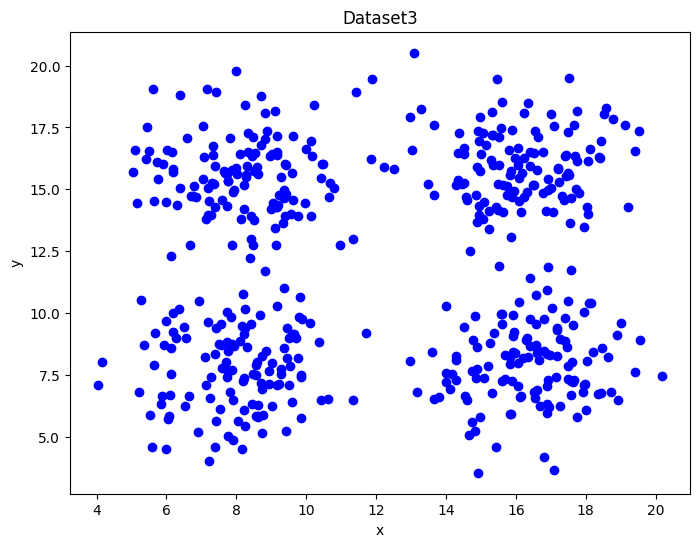

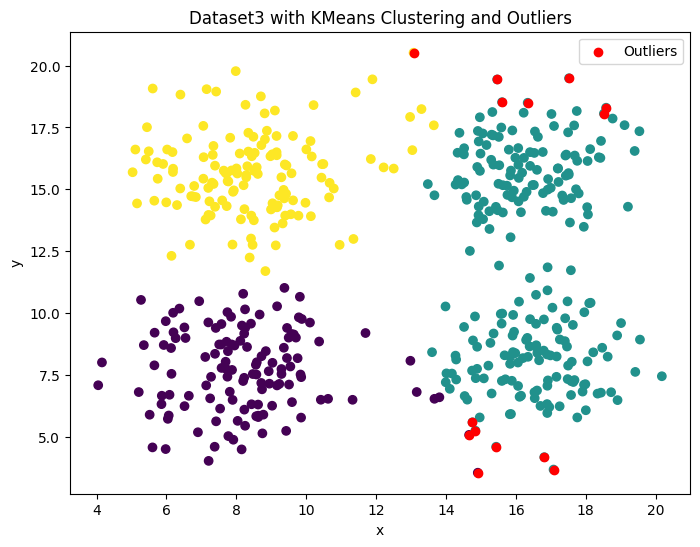

,x,y,cluster,distance_to_center
0,15.4640,19.44090,1,7.581132
23,18.5820,18.29840,1,6.738465
54,13.0717,20.52010,2,6.702230
66,16.3384,18.49900,1,6.580230
88,18.5195,18.06210,1,6.494650
111,15.6038,18.52340,1,6.653399
118,17.5210,19.49020,1,7.651935
131,14.9105,3.55460,0,7.823685
136,16.8118,4.18410,1,7.745439
149,17.0785,3.68252,1,8.263640


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

dataset3 = pd.read_csv('./Datasets/Dataset3.txt', delimiter=',')

data3 = dataset3[['x', 'y']].copy()

plt.figure(figsize=(8, 6))
plt.scatter(data3['x'], data3['y'], c='blue')
plt.title('Dataset3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

kmeans3 = KMeans(n_clusters=3, random_state=13).fit(data3)
data3.loc[:, 'cluster'] = kmeans3.labels_
data3.loc[:, 'distance_to_center'] = kmeans3.transform(data3[['x', 'y']]).min(axis=1)

threshold = data3['distance_to_center'].mean() + 2 * data3['distance_to_center'].std()
outliers = data3[data3['distance_to_center'] > threshold]

plt.figure(figsize=(8, 6))
plt.scatter(data3['x'], data3['y'], c=data3['cluster'], cmap='viridis')
plt.scatter(outliers['x'], outliers['y'], c='red', label='Outliers')
plt.title('Dataset3 with KMeans Clustering and Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


outliers

## Apendix

## This code ran on Collab


In [ ]:
import cudf
import cuml
from cuml.cluster import DBSCAN as cuDBSCAN
from cuml.metrics.cluster import silhouette_score
import numpy as np

# Convert data to cuDF DataFrame
gdf_X = cudf.DataFrame.from_records(gdf_data2.values)

eps_values = np.arange(0.6, 1.5, 0.01)
min_samples_values = np.arange(45, 70)

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = cuDBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(gdf_X)

        # Ignore the models that do not produce clusters
        if len(set(labels.to_numpy())) > 1:
            score = silhouette_score(gdf_X, labels)
            results.append((eps, min_samples, score))

# Convert results to a DataFrame and sort by silhouette score
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score'])
sorted_results_df = results_df.sort_values(by='silhouette_score', ascending=False)

print("Sorted Silhouette Scores with Parameters:")
print(sorted_results_df)

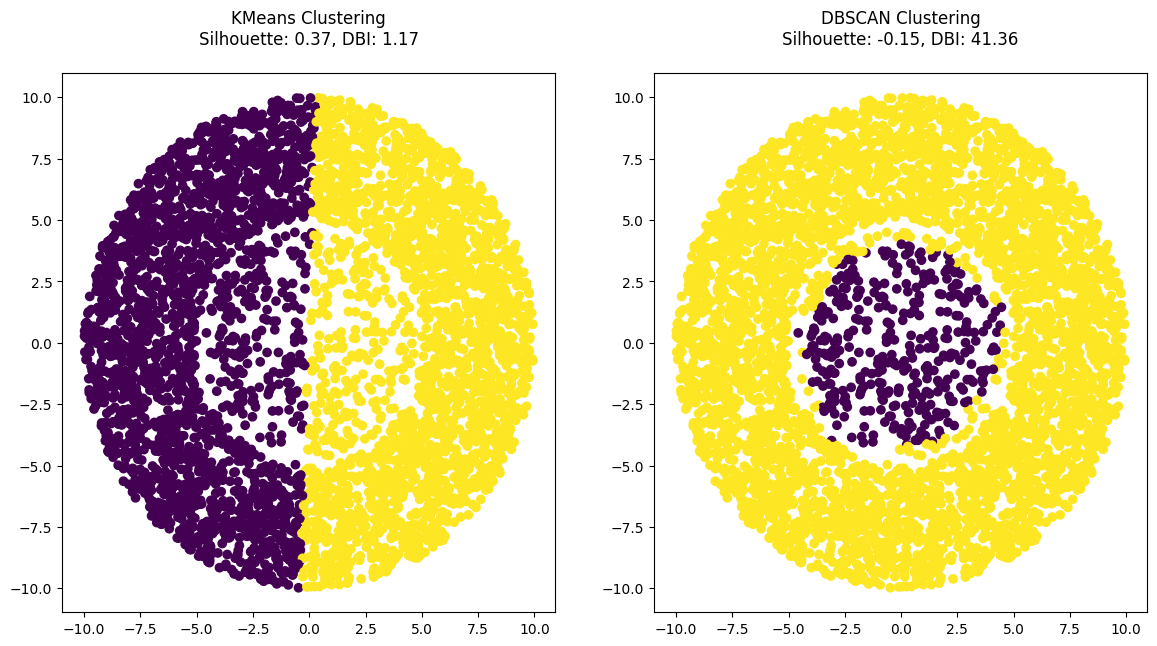

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  davies_bouldin_score, silhouette_score
import scikit_posthocs as sp
# Generate a dataset with a solid circle inside another ring
dataset1 = pd.read_csv('./Datasets/Dataset1.txt', delimiter=',')
dataset2 = pd.read_csv('./Datasets/Dataset2.txt', delimiter=',')

data1 = dataset1[['x', 'y']]
data2 = dataset2[['x', 'y']]
X=data2
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=13)
kmeans_labels = kmeans.fit_predict(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.15, min_samples=57)
dbscan_labels = dbscan.fit_predict(X)

# Calculate metrics for KMeans
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_dbi = davies_bouldin_score(X, kmeans_labels)
#kmeans_dunn = sp.posthoc_dunn(X, kmeans_labels)

# Calculate metrics for DBSCAN
dbscan_silhouette = silhouette_score(X, dbscan_labels)
dbscan_dbi = davies_bouldin_score(X, dbscan_labels)
#dbscan_dunn = sp.posthoc_dunn(X, dbscan_labels)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].scatter(X.values[:, 0], X.values[:, 1], c=kmeans_labels, cmap='viridis')
ax[0].set_title(f'KMeans Clustering\nSilhouette: {kmeans_silhouette:.2f}, DBI: {kmeans_dbi:.2f}\n')

ax[1].scatter(X.values[:, 0], X.values[:, 1], c=dbscan_labels, cmap='viridis')
ax[1].set_title(f'DBSCAN Clustering\nSilhouette: {dbscan_silhouette:.2f}, DBI: {dbscan_dbi:.2f}\n')

plt.show()
